In [11]:
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv('HW2/heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

([<matplotlib.axis.XTick at 0x1e58a8ec7d0>,
 [Text(0, 0, 'healthy'), Text(1, 0, 'unhealthy')])

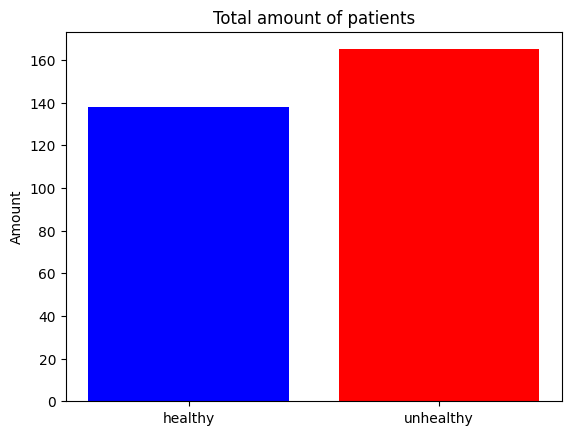

In [14]:
counts = df["target"].value_counts().sort_index()
plt.bar(counts.index, counts.values, color=["blue", "red"])
plt.title("Total amount of patients")
plt.ylabel("Amount") 
plt.xticks([0, 1], ['healthy', 'unhealthy'])

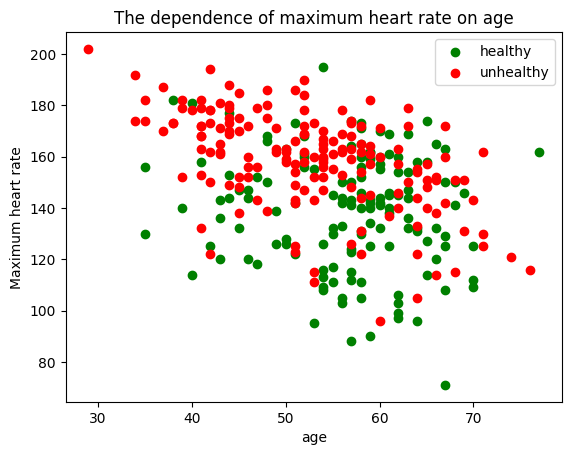

In [15]:
healthy = df[df["target"] == 0]
diseased = df[df["target"] == 1]

plt.scatter(healthy["age"], healthy["thalach"], color='green', label='healthy')
plt.scatter(diseased["age"], diseased["thalach"], color='red', label='unhealthy')

plt.xlabel("age")
plt.ylabel("Maximum heart rate")
plt.title("The dependence of maximum heart rate on age")
plt.legend()
plt.show()

In [16]:
df["sex"] = df["sex"].map({0: "female", 1: "male"})
df = pd.get_dummies(df, dtype="int")
df

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_female,sex_male
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1,0,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1
2,41,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,1,0,3,0,1,0
299,45,3,110,264,0,1,132,0,1.2,1,0,3,0,0,1
300,68,0,144,193,1,1,141,0,3.4,1,2,3,0,0,1
301,57,0,130,131,0,1,115,1,1.2,1,1,3,0,0,1


In [17]:
chol_avg = df.groupby(df["target"] == 1)["chol"].mean()
chol_avg.index = ["Healhy", "Unhealthy"]
print(chol_avg)

Healhy       251.086957
Unhealthy    242.230303
Name: chol, dtype: float64


In [18]:
print(df[["age", "trestbps", "chol", "thalach"]].describe())

columns = ["age", "trestbps", "chol", "thalach"] 
for col in columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

print()
print("After normalization:")
print(df[["age", "trestbps", "chol", "thalach"]].describe())

              age    trestbps        chol     thalach
count  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865
std      9.082101   17.538143   51.830751   22.905161
min     29.000000   94.000000  126.000000   71.000000
25%     47.500000  120.000000  211.000000  133.500000
50%     55.000000  130.000000  240.000000  153.000000
75%     61.000000  140.000000  274.500000  166.000000
max     77.000000  200.000000  564.000000  202.000000

After normalization:
              age    trestbps        chol     thalach
count  303.000000  303.000000  303.000000  303.000000
mean     0.528465    0.354941    0.274575    0.600358
std      0.189210    0.165454    0.118335    0.174849
min      0.000000    0.000000    0.000000    0.000000
25%      0.385417    0.245283    0.194064    0.477099
50%      0.541667    0.339623    0.260274    0.625954
75%      0.666667    0.433962    0.339041    0.725191
max      1.000000    1.000000    1.000000    1.000000
